# Case Study
## Advance Regression for US House Price Prediction

## Analysis & Observations
### The analysis & Observation can be approached in the following steps:
* Load Data & Analyse variables, Data Inspection
* EDA
* Train & Test Split
* Scaling
* Modelling
* Tuning with Regularization (Ridge & Lasso)
* Model Evaluation

### Load Data, Analyse variables & Data Inspection

In [80]:
# !pip install numpy
# !pip install pandas
# !pip isntall seaborn
# !pip install sklearn
# !pip install matplotlib
# !pip install plotly

In [81]:
# Importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [82]:
df_data = pd.read_csv("train.csv", encoding='utf-8')
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
# Check the dimensions
df_data.shape

(1460, 81)

In [84]:
# Check the data types & check for the missing values
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [85]:
# Count the number of rows
df_data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType        588
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

In [86]:
# Verify if null values exists
print(f"Any NaN values? {df_data.isna().values.any()}")

# Verify if duplicate values exists
print(f"Any Duplicate values? {df_data.duplicated().values.any()}")

Any NaN values? True
Any Duplicate values? False


### Coclusion
* There are null (i.e NaN). Therefore, they have to be cleaned up
* The count of records are NOT same. Therefore, it has to be treated for either dropping the missing values or imputing data into it.
* There are no duplicated values. Fantastic!

### Descriptive Statistics
* What is the average sales price of the house in the dataset?

In [87]:
df_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [88]:
# Verify the outliers in numerical columns
df_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

In [89]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [90]:
df_data.shape

(1460, 81)

In [91]:
# Grouping the multiple columns with null values and then remove it or impute it justifiable values
df_data.columns[df_data.isnull().any()]
df_null = df_data.isnull().sum()/len(df_data)*100
df_null = df_null[df_null>0]
df_null.sort_values(inplace=True, ascending=False)
df_null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

### Conclusion
* Looking at the data and data dictionary it seems there are categorical data and some of them indicates there amenties that range from low to high - therefore, for the ones where we have blank we will impute the data with "unkown"

In [92]:
df_null_columns = ['Alley', 'MasVnrType', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence','MiscFeature']

for item in df_null_columns:
    df_data[item].fillna('unkown', inplace=True)

In [93]:
df_data.columns[df_data.isnull().any()]

df_null2 = df_data.isnull().sum()/len(df_data)*100
df_null2 = df_null2[df_null2>0]
df_null2.sort_values(inplace=True, ascending=False)
df_null2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [94]:
df_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [95]:
df_data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [96]:
df_data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [97]:
df_data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [98]:

df_data['LotFrontage'] = df_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df_data["GarageYrBlt"].fillna(df_data["GarageYrBlt"].median(), inplace=True)
df_data["MasVnrArea"].fillna(df_data["MasVnrArea"].median(), inplace=True)
df_data["Electrical"].dropna(inplace=True)

In [99]:
df_data['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [100]:
df_data['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [101]:
df_data['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [102]:
# Get the numeric fields
df_data_numeric = df_data.select_dtypes(include=['float64','int64'])

In [103]:
# Drop id column from the new data frame
df_data_numeric = df_data_numeric.drop(['Id'],axis=1)
df_data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### EDA 
* Plotting the graphs of target variable (Sales Price) with other Independent Variable for doing the Univariate & Bivariate Exploratory Data Analysis

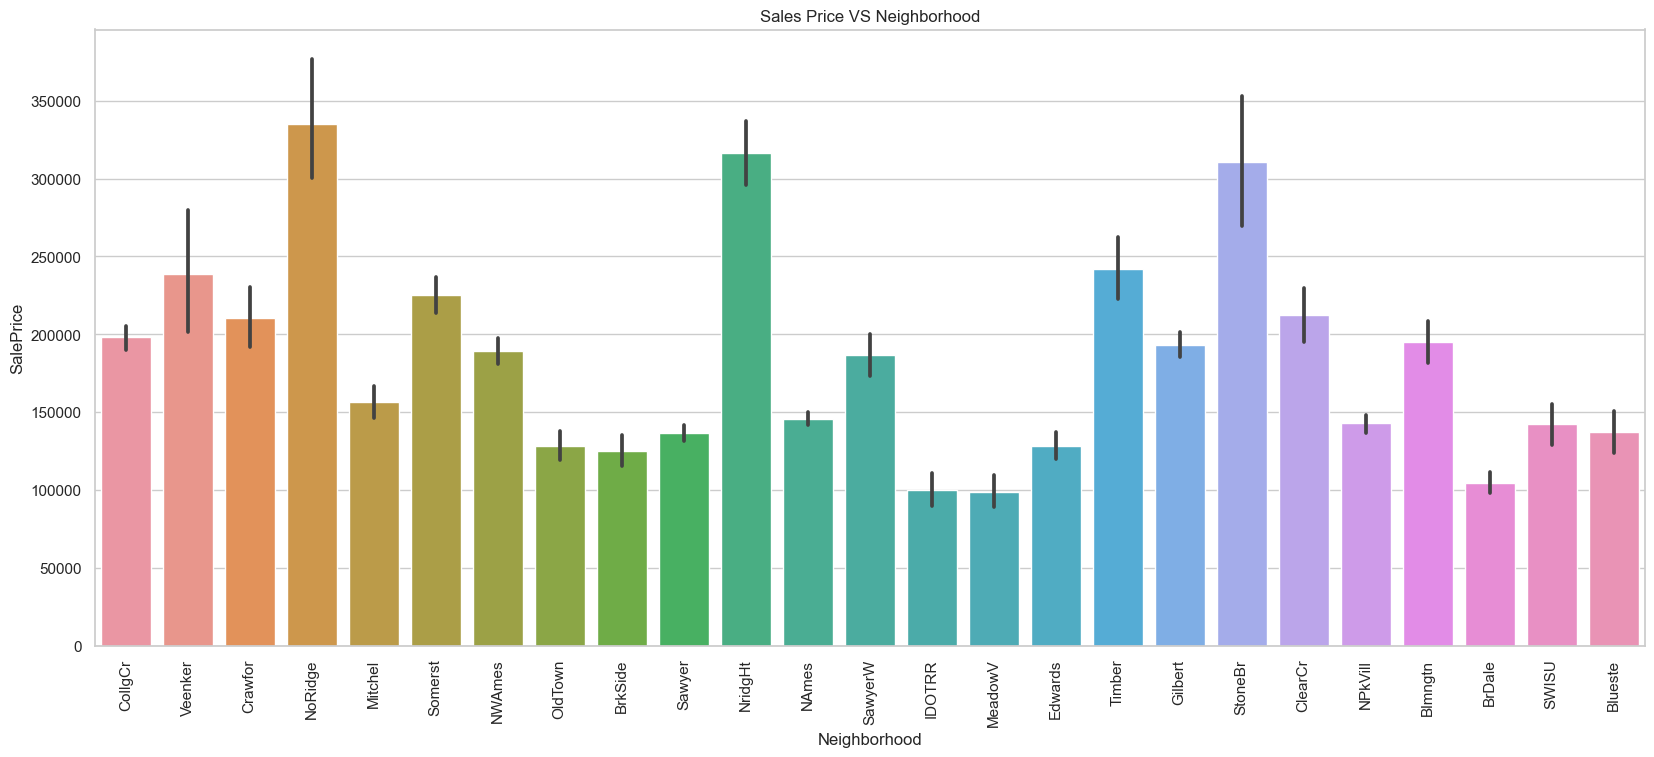

In [104]:
# Neigjbourhood vs SalePrice Bar Chart
plt.figure(figsize=(20,8))
sns.set_theme(style="whitegrid")
sns.barplot(x='Neighborhood', y='SalePrice', data=df_data)
plt.title("Sales Price VS Neighborhood")
plt.xticks(rotation=90)
plt.show()

### Inference-1
* Based on the above plot: Houses in some neighborhood has been sold at very high price (Univariate Variable = Neighborhood)

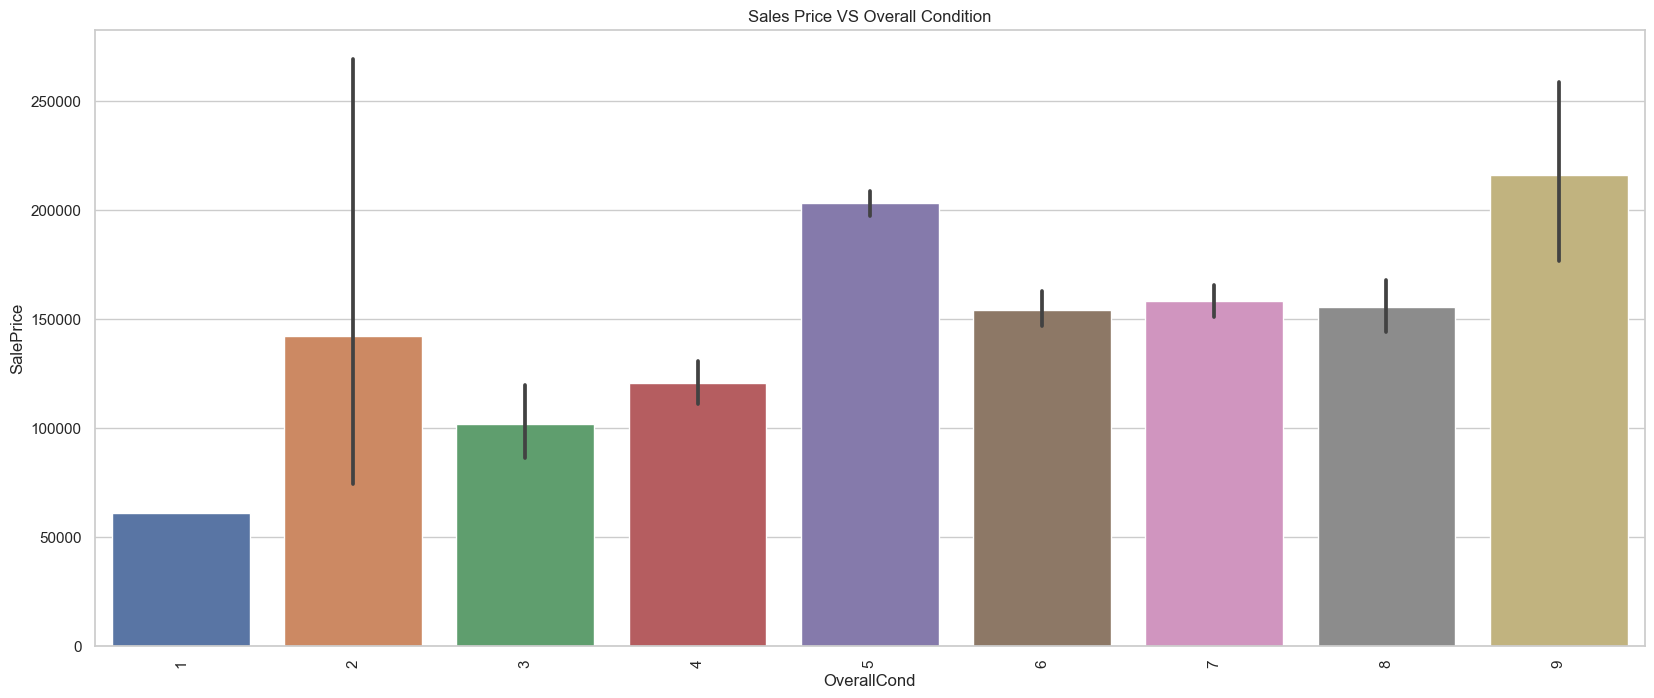

In [105]:
# Sales Price VS Overall Condition

plt.figure(figsize=(20,8))
sns.set_theme(style="whitegrid")
sns.barplot(x='OverallCond', y='SalePrice', data=df_data)
plt.title("Sales Price VS Overall Condition")
plt.xticks(rotation=90)
plt.show()

### Inference-2
* Poor conditioned house are sold at very low price
* It is seen that average conditioned has been sold at significant high price as from the plot it can been seen that price of the average conditioned vs price of Excellent conditioned houses there is a marginal difference in the sales price

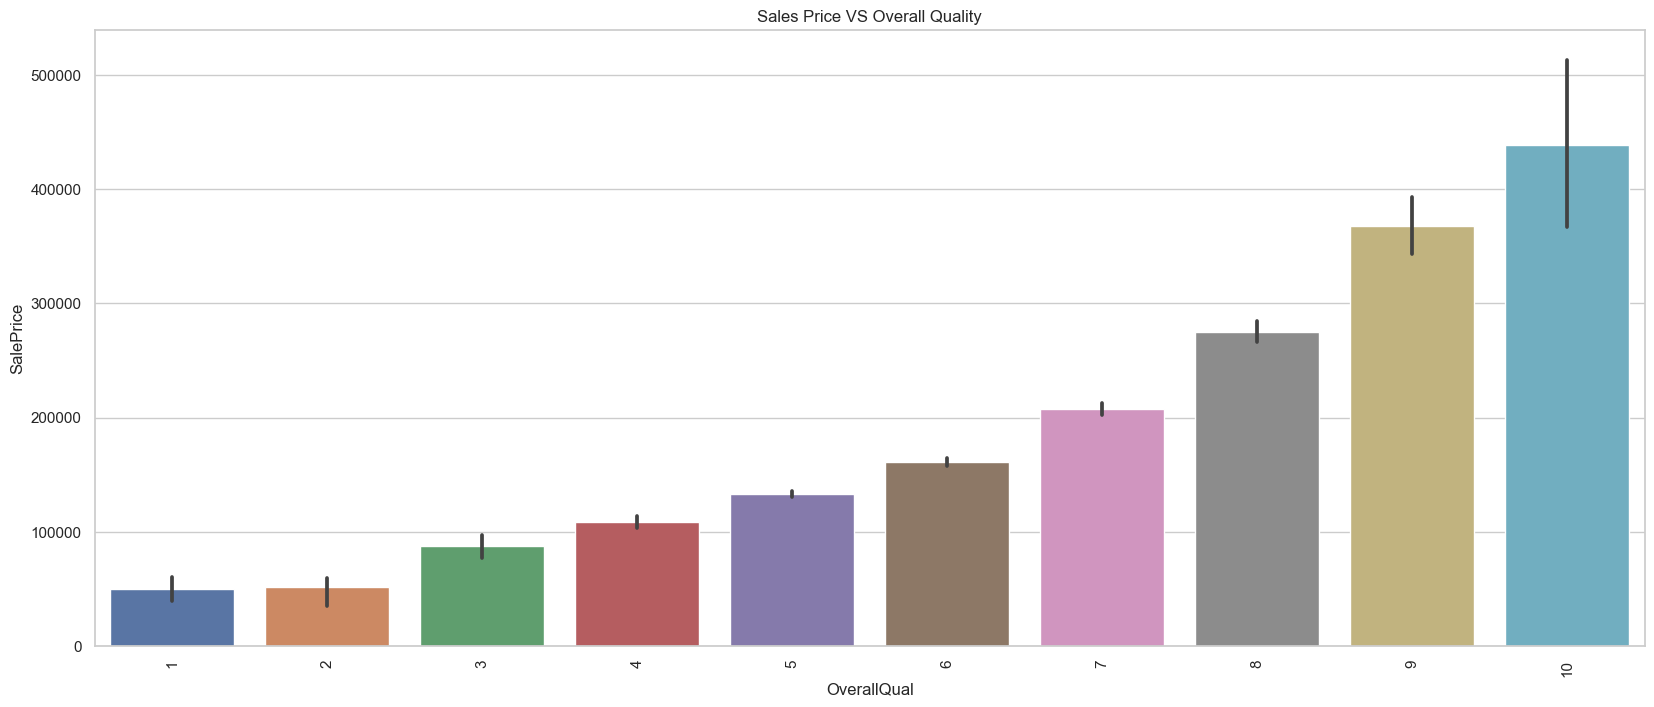

In [106]:
# Sales Price VS Overall Quality
plt.figure(figsize=(20,8))
sns.set_theme(style="whitegrid")
sns.barplot(x='OverallQual', y='SalePrice', data=df_data)
plt.title("Sales Price VS Overall Quality")
plt.xticks(rotation=90)
plt.show()

### Inference-3
* Overall quality of the house is directly proportional to the the sales price of the house

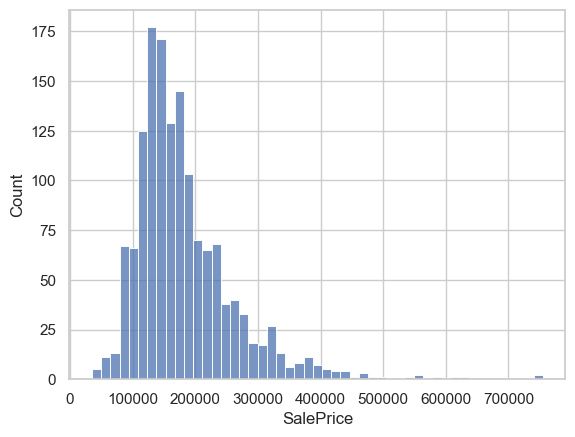

In [107]:
sns.histplot(df_data['SalePrice'])
plt.show()

### Inference-4
* The data of sales price is left skewed therefore, it needs to be transformed to fetch the centralized data
* We will use the logarithmic scale to do it.

In [108]:
df_data['SalePrice'] = np.log1p(df_data['SalePrice'])

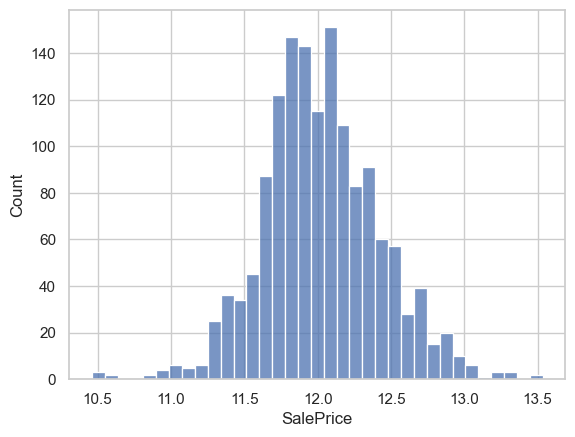

In [109]:
sns.histplot(df_data['SalePrice'])
plt.show()

### Correlation Matrix with all the fields

In [110]:
df_corr = df_data_numeric.corr()
df_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.031873,0.385190,0.107226,0.006620,0.186561,0.054190,0.245232,-0.005627,0.332619,0.249295,0.062380,0.281393,0.339085,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


### Correation Heatmap

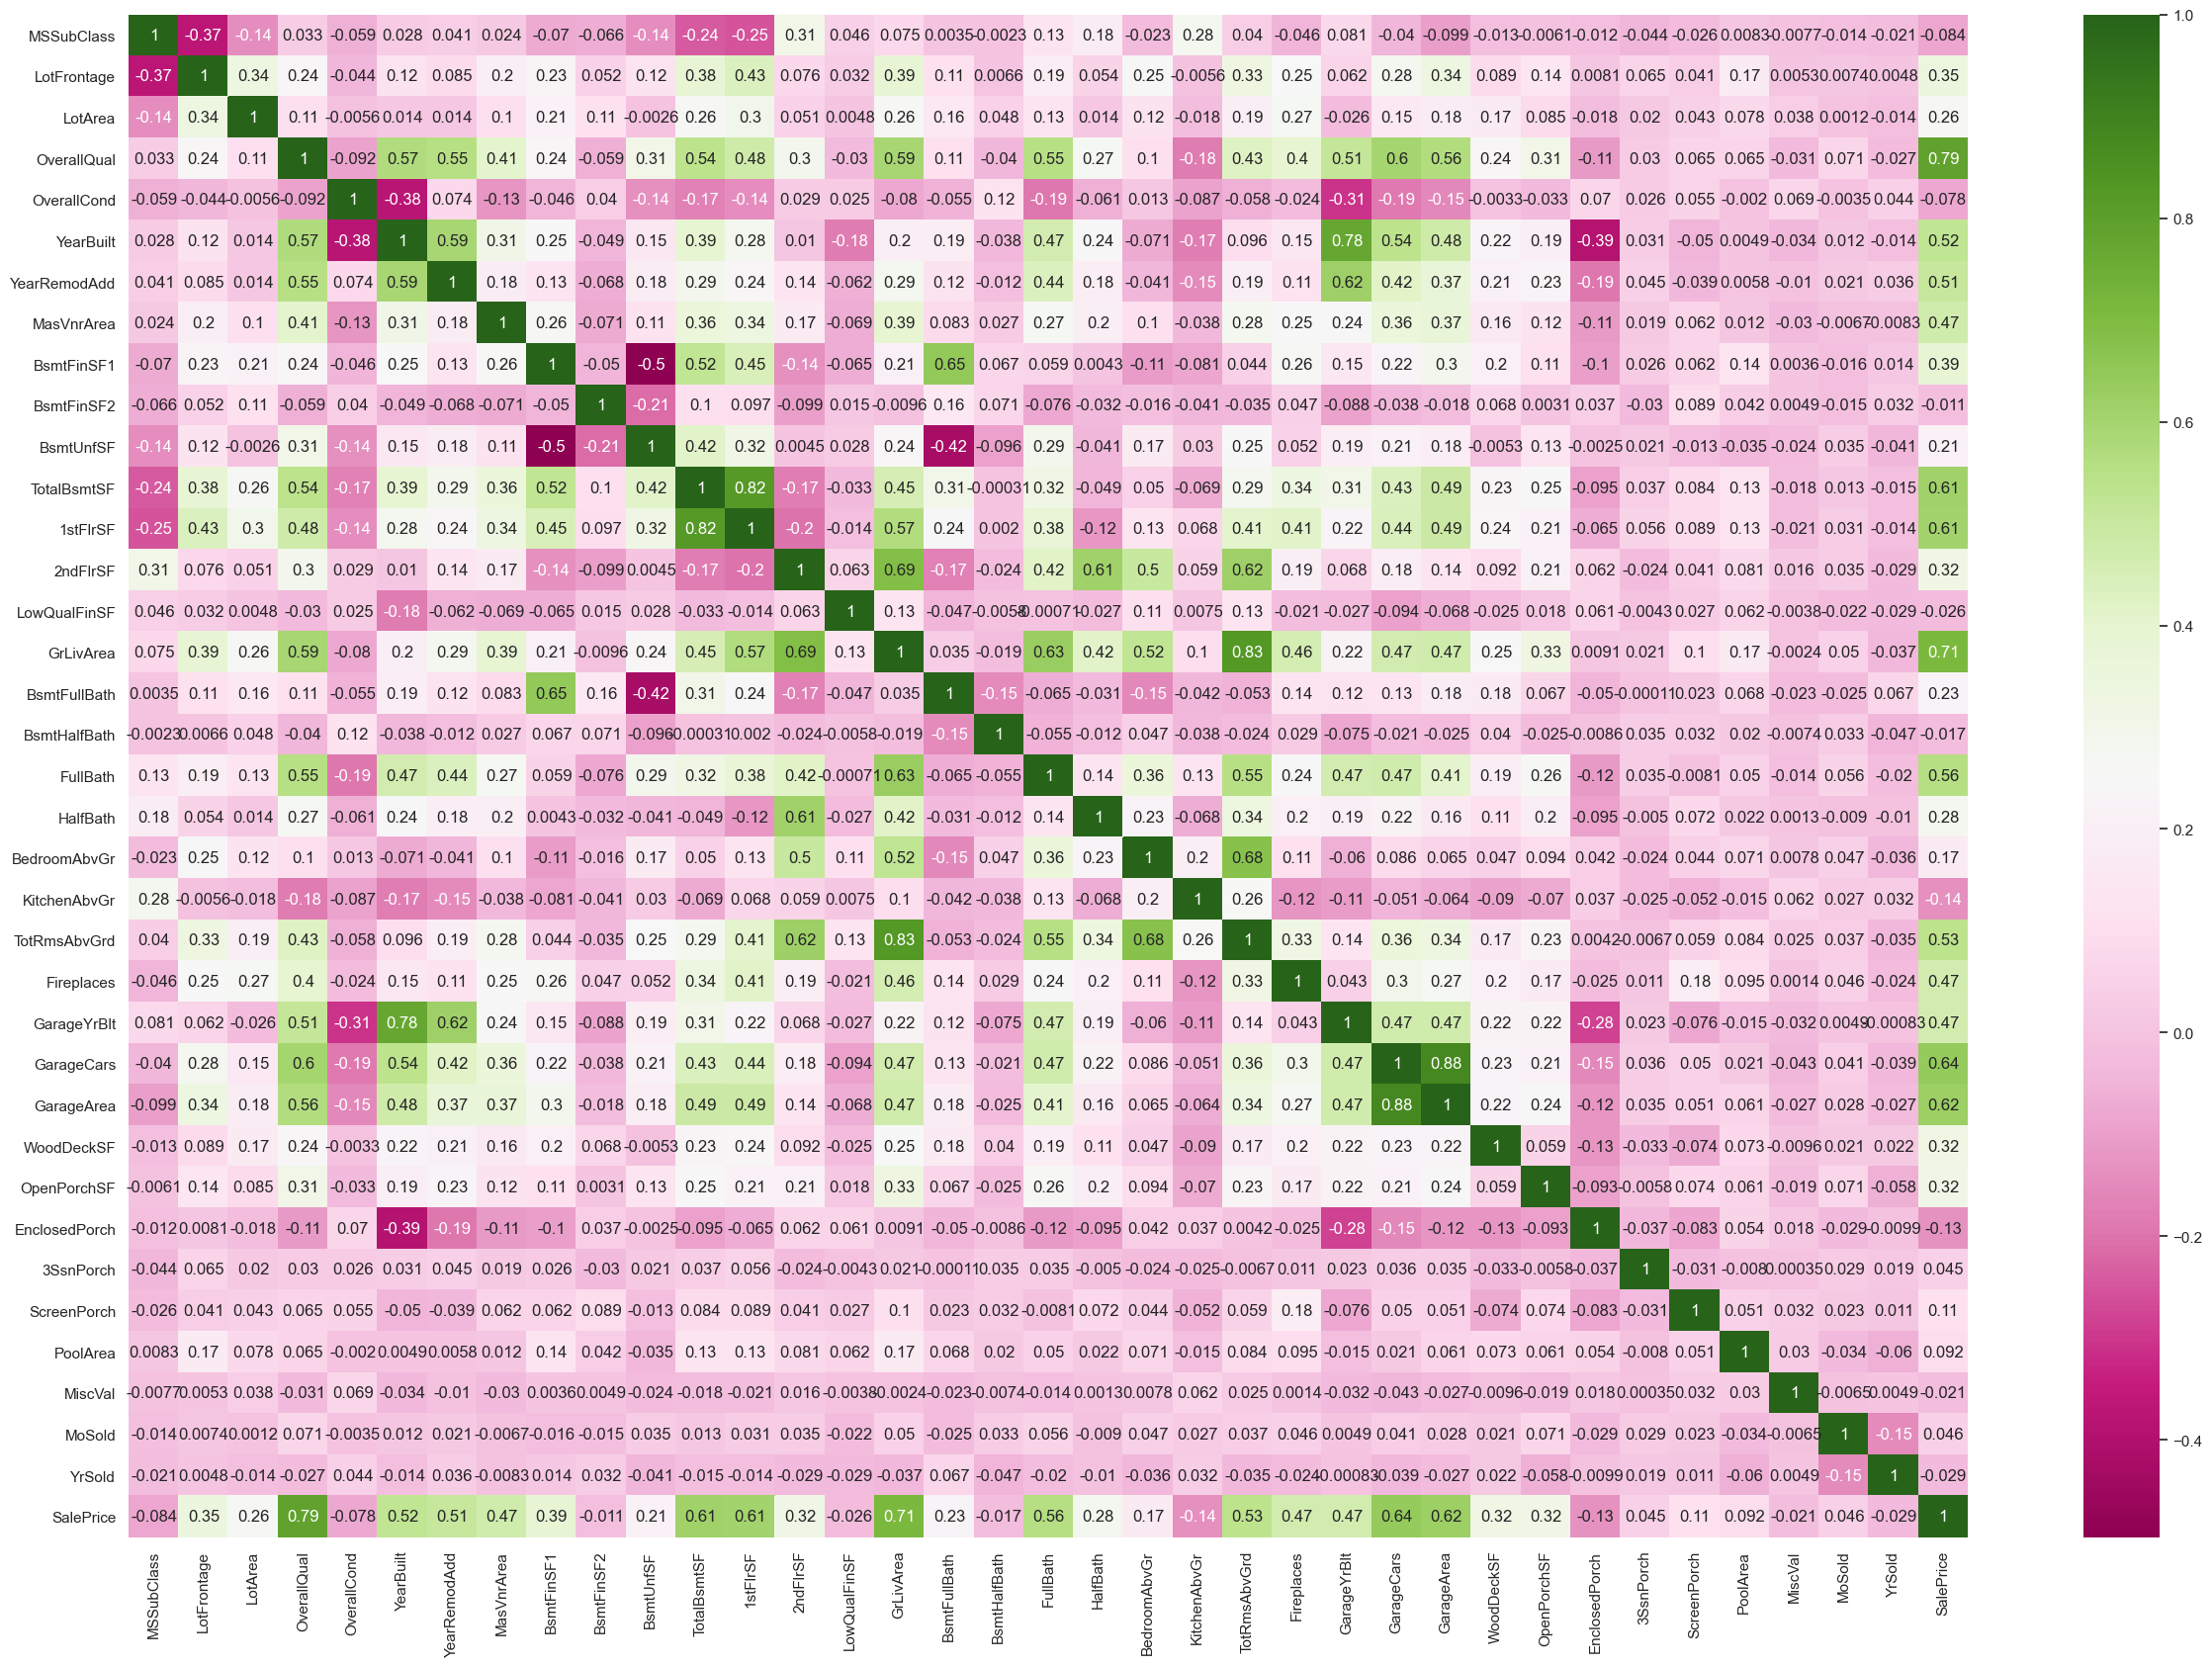

In [ ]:
plt.figure(figsize=(30,20))

sns.heatmap(df_corr, cmap='PiYG', annot=True)
plt.show()


In [112]:
# Create the pairplots
# sns.set()
df_data_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df_data[cols], size=2.5)
plt.show()


In [114]:
df_data = df_data.drop(['GarageCars'], axis = 1)
df_data = df_data.drop(['BsmtUnfSF'], axis = 1)
df_data = df_data.drop(['TotRmsAbvGrd'], axis = 1)
df_data = df_data.drop(['GarageYrBlt'], axis = 1)    

df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,unkown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,unkown,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,unkown,unkown,unkown,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,unkown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,unkown,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,unkown,unkown,unkown,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,unkown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,unkown,unkown,unkown,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,unkown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,unkown,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,unkown,unkown,unkown,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,unkown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,unkown,unkown,unkown,0,12,2008,WD,Normal,12.429220


### Inference-4
* Dropped the above columns in relation to the sales prices as there is no significant impact of these variables

In [115]:
df_data.select_dtypes(exclude=['object'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,460,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,1542,2073,0,0,2073,1,0,2,0,3,1,2,500,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,1152,1188,1152,0,2340,0,0,2,0,4,1,2,252,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,1078,1078,0,0,1078,1,0,1,0,2,1,0,240,366,0,112,0,0,0,0,4,2010,11.864469


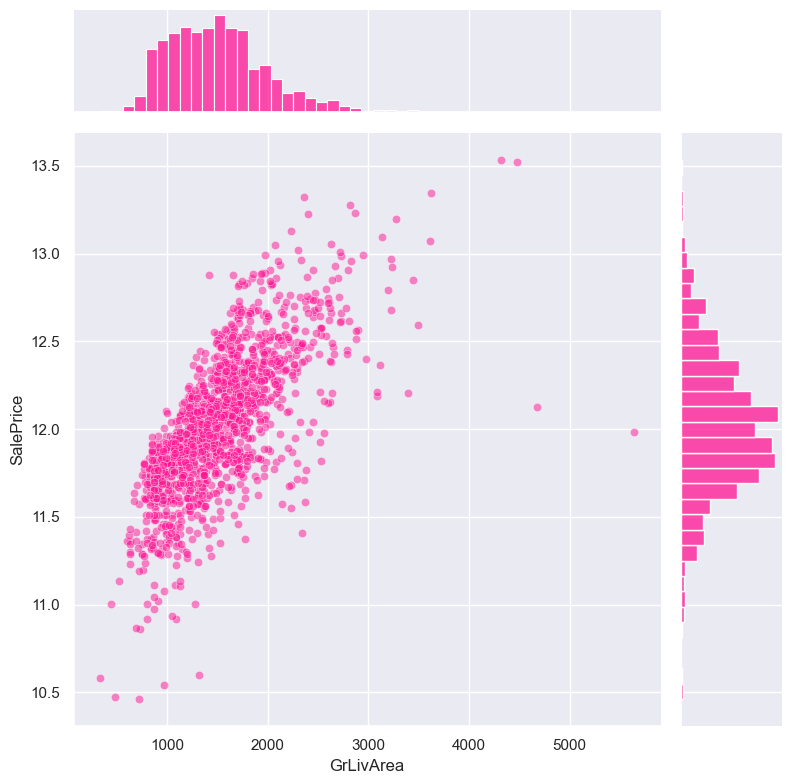

In [116]:
with sns.axes_style('darkgrid'):
    sns.jointplot(x='GrLivArea', y='SalePrice', height=8, kind='scatter', color='deeppink', joint_kws={'alpha':0.5}, data=df_data)
plt.show()

In [117]:
# Remove the outliers on lower right side of the GrLivArea    
df_data = remove_outliers(df_data,'GrLivArea')

In [118]:
df_data.shape

(1429, 77)

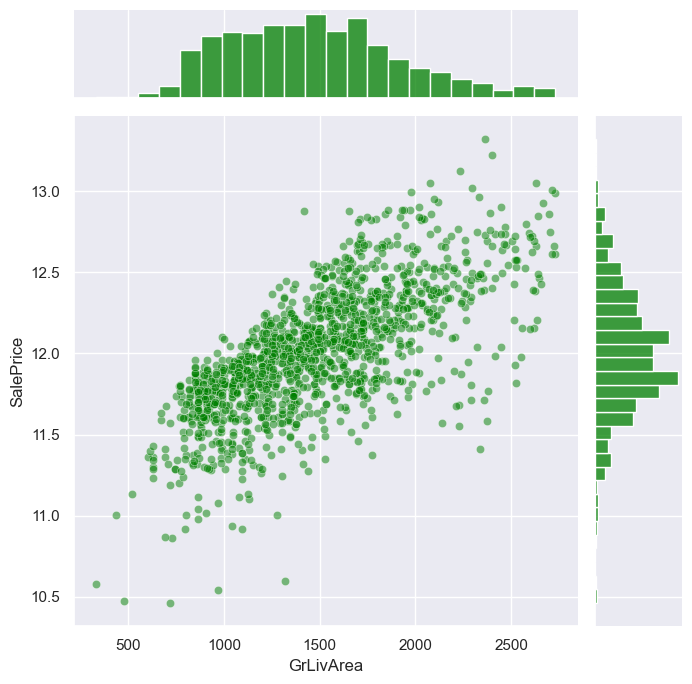

In [119]:
with sns.axes_style('darkgrid'):
    sns.jointplot(x='GrLivArea', y='SalePrice', height=7, color='green', joint_kws={'alpha': 0.5}, data=df_data)
plt.show()

### Inference-6
* Not advisable to remove the outliers because quantity of the data is less for this dataset
* From the pair plot it is understood that the sales price of the houses are steady increaing from lower floor to 2nd floor. Check the pair plot above for the same

## Derieved Metrics
* 'Age of the house' field can be drieved Year Sold & Year Built which will give some inference on the house's sale price trend

In [120]:
df_data['HouseAge'] = df_data['YrSold'] - df_data['YearBuilt']

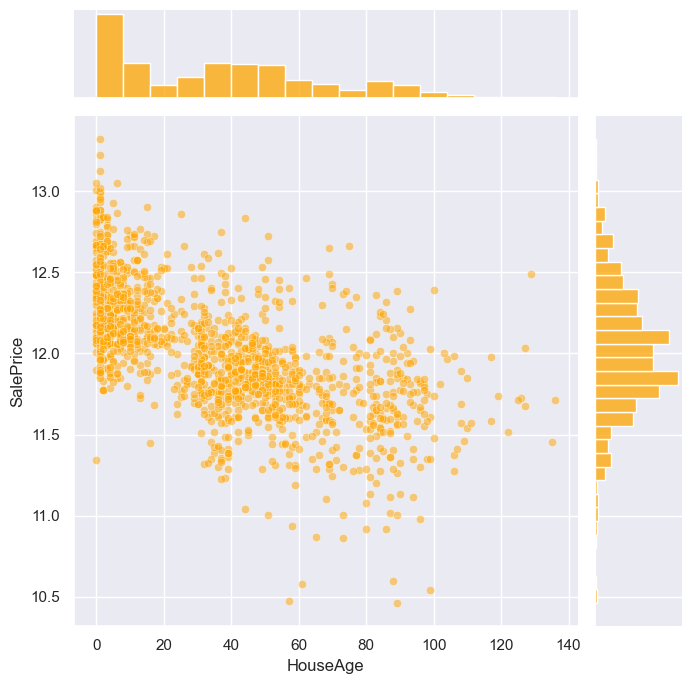

In [121]:
# Plotting the graph: Property Age vs Sales Price trend
with sns.axes_style('darkgrid'):
    sns.jointplot(x=df_data['HouseAge'], y=df_data['SalePrice'], height=7, color='orange', joint_kws={'alpha':0.5})
plt.show()

### Inference-7
* This trend shows that newer the house sales price is higher and as the age increases the price decreases. Therefore, there is no return on investment on the real estate

In [122]:
# Dropping the Month, Year sold columns as it will not be going to add value for our model.

df_data = df_data.drop(['MoSold'], axis = 1)
df_data = df_data.drop(['YrSold'], axis = 1)
df_data = df_data.drop(['YearBuilt'], axis = 1)
df_data = df_data.drop(['YearRemodAdd'], axis = 1)
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge
0,1,60,RL,65.0,8450,Pave,unkown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,unkown,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,unkown,unkown,unkown,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,unkown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,unkown,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,unkown,unkown,unkown,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,unkown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,unkown,unkown,unkown,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,unkown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,unkown,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,unkown,unkown,unkown,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,unkown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,unkown,unkown,unkown,0,WD,Normal,12.429220,8


#### Checking few random features if they show any low variance

In [123]:
print(f'Street:\n{df_data.Street.value_counts()}')
print('----------')
print(f'Utilities:\n{df_data.Utilities.value_counts()}')


Street:
Street
Pave    1423
Grvl       6
Name: count, dtype: int64
----------
Utilities:
Utilities
AllPub    1428
NoSeWa       1
Name: count, dtype: int64


### Inference-8
* These two feature exhibit low variance in the data, so we can drop these columns as they will not help much in prediction model building process.

In [124]:
df_data = df_data.drop(['Street'], axis=1)
df_data = df_data.drop(['Utilities'], axis=1)

In [125]:
df_data.select_dtypes(include=['float64','int64'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge
0,1,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,12.247699,5
1,2,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,12.109016,31
2,3,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,12.317171,7
3,4,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,11.849405,91
4,5,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,460,0,40,0,0,0,0,0,12.072547,8
1456,1457,20,85.0,13175,6,6,119.0,790,163,1542,2073,0,0,2073,1,0,2,0,3,1,2,500,349,0,0,0,0,0,0,12.254868,32
1457,1458,70,66.0,9042,7,9,0.0,275,0,1152,1188,1152,0,2340,0,0,2,0,4,1,2,252,0,60,0,0,0,0,2500,12.493133,69
1458,1459,20,68.0,9717,5,6,0.0,49,1029,1078,1078,0,0,1078,1,0,1,0,2,1,0,240,366,0,112,0,0,0,0,11.864469,60


#### Check the variance for the above numeric fields

In [126]:
df_numeric_variance = df_data.select_dtypes(include=['float64','int64'])

In [127]:
for item in df_numeric_variance:
    print(df_data[item].value_counts())

Id
1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: count, Length: 1429, dtype: int64
MSSubClass
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: count, dtype: int64
LotFrontage
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: count, Length: 112, dtype: int64
LotArea
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: count, Length: 1047, dtype: int64
OverallQual
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: count, dtype: int64
OverallCond
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: count, dtype: int64
MasVnrArea
0.0

In [128]:
df_data = df_data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

### Inference-9
* Dropping the above columns as there were very low variance in them.
* Even after imputing the data it did exhibitted low variance.

In [129]:
df_data.shape

(1429, 63)

## Train & Test Data Split
* We can't use all 1429 enteries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen. That way we can get the better idea in the real world.

### Data Preparation

In [130]:
# Dropping Id from the dataset
df_data = df_data.drop(['Id'], axis=1)

In [131]:
df_data = pd.get_dummies(df_data, drop_first=True)

In [132]:
target = df_data['SalePrice']
features = df_data.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, test_size=0.3, random_state=50)

In [133]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 70.0% of the total data.
Test data makes up the remaining 30.0%.


## Scaling

In [134]:
# Scaling the features
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'HouseAge']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'HouseAge']])

In [135]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_unkown,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_unkown,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_unkown,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_unkown,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_unkown,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PropAge
11,0.085645,0.746261,0.154684,2.241710,-0.513939,1.145212,1.323938,-0.300737,0.345478,0.113320,1.995226,-0.111211,1.923409,1.131973,-0.250936,2.754667,-0.727119,1.478865,-0.222797,2.231812,1.267298,0.485675,-0.351334,-0.378185,-0.115383,-0.268919,-0.054574,1,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,-1.209026
1070,-0.869945,0.130905,-0.020017,-0.764271,-0.513939,0.152993,0.360916,-0.300737,0.030191,-0.267693,-0.769750,-0.111211,-0.932170,1.131973,-0.250936,-0.990631,-0.727119,0.212713,-0.222797,-0.918240,-0.857140,-0.758474,-0.368801,-0.378185,-0.115383,3.351363,-0.054574,51,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,0.445587
513,-0.869945,0.083570,-0.115156,-0.012775,-0.513939,-0.564274,-0.223442,-0.300737,0.119563,-0.176705,-0.769750,-0.111211,-0.860557,-0.816345,-0.250936,-0.990631,1.275964,0.212713,-0.222797,-0.918240,0.077613,0.257158,-0.718144,2.265177,-0.115383,-0.268919,-0.054574,24,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,-0.447904
467,0.324542,0.462250,-0.086269,-0.764271,1.258264,0.774624,-0.106571,-0.300737,-0.764234,-0.722635,1.060654,-0.111211,0.401627,-0.816345,-0.250936,-0.990631,1.275964,0.212713,-0.222797,2.231812,-0.734395,0.663411,-0.718144,-0.378185,-0.115383,-0.268919,-0.054574,65,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,Tru

In [136]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_unkown,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_unkown,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_unkown,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_unkown,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_unkown,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PropAge
461,0.282163,-0.495702,-0.339155,0.620334,3.325664,-0.606456,-0.211663,0.997135,-1.205047,-1.556925,0.506037,-0.09698,-0.813247,1.073876,-0.215271,-1.099305,-0.803081,0.172438,-0.185172,-0.988037,0.530538,1.165362,-0.747921,-0.328244,-0.127886,-0.27671,0.0,73,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,1.326790
335,3.002345,0.729276,17.009026,-0.825989,0.435637,-0.606456,1.881258,0.620602,1.075768,1.258064,-0.435654,-0.09698,0.616745,2.969732,-0.215271,0.802316,-0.803081,0.172438,-0.185172,2.151725,0.299231,4.227488,-0.747921,-0.328244,-0.127886,-0.27671,0.0,43,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,0.303675
200,-0.851246,0.484280,-0.190859,-1.549150,-0.527705,-0.606456,-1.026482,-0.257974,0.157612,-0.084718,-0.835813,-0.09698,-0.843999,-0.821980,-0.215271,0.802316,-0.803081,-1.081391,-0.185172,-0.988037,-0.138775,0.248203,0.135073,-0.328244,-0.127886,-0.27671,0.0,7,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,-0.924063
214,0.055482,-0.005711,0.068493,-0.102827,1.398980,0.272709,-0.146477,-0.257974,-0.891708,-1.249541,0.848688,-0.09698,-0.248718,-0.821980,-0.215271,-1.099305,1.176929,0.172438,-0.185172,-0.988037,-0.832694,-0.728127,-0.251236,-0.328244,-0.127886,-0.27671,0.0,33,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,Fa

## Model Building

#### Running the regression on training data. Verify how much is the r-squared for regression on the training data

In [137]:

regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.94


#### 0.94 is a very high r-squared!

### Evaluate the Coefficients of the Model
Here we do a sense check on our regression coefficents. The first thing to look for is the coefficents have the expected sign (positive or negative).

In [138]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
MSSubClass,-0.011871
LotFrontage,0.007362
LotArea,0.029948
OverallQual,0.058497
OverallCond,0.049182
...,...
SaleCondition_Alloca,0.005945
SaleCondition_Family,0.023918
SaleCondition_Normal,0.073622
SaleCondition_Partial,0.177690


#### There are lot of features that is practically not possible to do the evaluation one by one hence adopting RFE technique to elimnate the features

In [139]:
rfe = RFE(regr, n_features_to_select=100)
rfe = rfe.fit(X_train, y_train)

In [140]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 43),
 ('LotFrontage', False, 84),
 ('LotArea', False, 9),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 91),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 90),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 61),
 ('BsmtHalfBath', False, 105),
 ('FullBath', False, 66),
 ('HalfBath', False, 63),
 ('BedroomAbvGr', False, 102),
 ('KitchenAbvGr', False, 82),
 ('Fireplaces', False, 103),
 ('GarageArea', False, 11),
 ('WoodDeckSF', False, 54),
 ('OpenPorchSF', False, 108),
 ('EnclosedPorch', False, 77),
 ('3SsnPorch', False, 86),
 ('ScreenPorch', False, 58),
 ('PoolArea', False, 74),
 ('HouseAge', False, 99),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 89),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 101),
 ('LandContour_HLS', True, 1),

In [141]:
column = X_train.columns[rfe.support_]
column

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandSlope_Sev', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exte

In [142]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'PavedDrive_P', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_unkown', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'PropAge'],
      dtype='object', length=110)

In [143]:
# Create X_test dataframe with RFE selected features
X_train_rfe = X_train[column]

In [144]:
X_train_rfe = pd.DataFrame(X_train[column])

In [145]:
X_train_rfe.shape

(1000, 100)

In [146]:
# Lets predict
y_train_predict = regr.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_predict)

0.9397185944055308

In [147]:
y_test_predict = regr.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_predict)

0.905348188897572

## Tuning with Regularization Techniques (Ridge & Lasso)

### Lasso Regression

In [148]:
# Get the dimensions for training dataset

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (1000, 210)
y_train: (1000,)


In [149]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'
# list of lambda to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lassoreg = Lasso()
folds = 5 ## Cross Validation using GridSearchCV

model_grid_cv = GridSearchCV(estimator=lassoreg, param_grid=params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)
model_grid_cv.fit(X_train,y_train)




Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [150]:
results_cv = pd.DataFrame(model_grid_cv.cv_results_)
results_cv = results_cv[results_cv['param_alpha'] <= 1]
results_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.335408,0.018462,0.054733,0.059988,0.0001,{'alpha': 0.0001},-0.089779,-0.078859,-0.088520,-0.085761,-0.077231,-0.084030,0.005083,2,-0.065863,-0.068108,-0.065349,-0.066398,-0.067661,-0.066676,0.001051
1,0.131236,0.054510,0.021989,0.004514,0.001,{'alpha': 0.001},-0.082670,-0.083102,-0.087939,-0.082521,-0.079298,-0.083106,0.002771,1,-0.075344,-0.076886,-0.074161,-0.076360,-0.076067,-0.075764,0.000944
2,0.055128,0.019973,0.018685,0.007327,0.01,{'alpha': 0.01},-0.089572,-0.093066,-0.097644,-0.090346,-0.088389,-0.091803,0.003300,3,-0.090686,-0.090070,-0.088256,-0.090145,-0.090677,-0.089967,0.000893
3,0.036201,0.008833,0.019954,0.005468,0.05,{'alpha': 0.05},-0.129535,-0.108978,-0.129770,-0.112486,-0.112591,-0.118672,0.009060,4,-0.117097,-0.117678,-0.116639,-0.118218,-0.117722,-0.117471,0.000547
4,0.038935,0.009072,0.017470,0.008525,0.1,{'alpha': 0.1},-0.179056,-0.144485,-0.168942,-0.153198,-0.153710,-0.159878,0.012406,5,-0.158600,-0.160937,-0.156852,-0.158981,-0.161126,-0.159299,0.001587


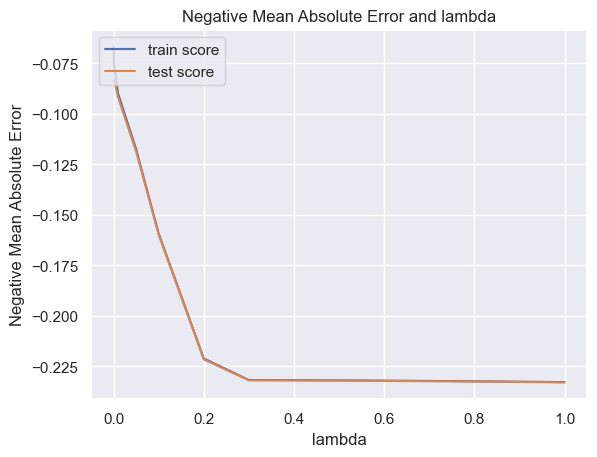

In [154]:
# convert the series to numpy arrays explicitly before plotting.
param_alpha = results_cv['param_alpha'].to_numpy()
mean_train_score = results_cv['mean_train_score'].to_numpy()
mean_test_score = results_cv['mean_test_score'].to_numpy()

# Plot mean test and train scores with lambdas (alphas)
plt.plot(param_alpha, mean_train_score)
plt.plot(param_alpha, mean_test_score)
plt.xlabel('lambda')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and lambda")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Inference-10
* Above graph shows that Negative Mean Absolute Error is quite low at 0.4 and stabilizes there after.
* However, we will choose lower value of lambda to balance the trade-off between variance & bias to get the smallest coeffienct of the feature

In [155]:
lambdas = 0.01
lasso = Lasso(alpha=lambdas)
lasso.fit(X_train, y_train)
lasso.coef_

array([-8.36547600e-03,  1.34230977e-02,  1.57977071e-02,  1.01844364e-01,
        5.63299968e-02,  0.00000000e+00,  3.24931189e-02,  0.00000000e+00,
        4.12039764e-02,  1.19118078e-04,  0.00000000e+00, -0.00000000e+00,
        1.29065486e-01,  9.70855990e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -6.54573846e-03,  2.51708087e-02,
        3.01198567e-02,  7.52335477e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.07271472e-03,  0.00000000e+00, -3.89138518e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

### Inference-11
* Above coeffient values shows that Lasso really helps in eliminating the coeffiecnt by bringing down significantly to 0 for the feature that have no or very less impact on the target variable which in this case is Sales Price.

In [156]:
# lasso model parameters
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = features.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params))

[('constant', 12.145),
 ('MSSubClass', -0.008),
 ('LotFrontage', 0.013),
 ('LotArea', 0.016),
 ('OverallQual', 0.102),
 ('OverallCond', 0.056),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.041),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.129),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.007),
 ('Fireplaces', 0.025),
 ('GarageArea', 0.03),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.006),
 ('PoolArea', 0.0),
 ('HouseAge', -0.004),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.

In [157]:
# Performing the Lasso Regression on the dataset again

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Make Prediction on test data
y_train_predict = lasso.predict(X_train)
print(f"R2 Score for Training Data: {metrics.r2_score(y_true=y_train, y_pred=y_train_predict)}")

y_test_predict = lasso.predict(X_test)
print(f"R2 Score for Test Data: {metrics.r2_score(y_true=y_test, y_pred=y_test_predict)}")

print(f"Root Mean Square Error (RMSE): {np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))}")

R2 Score for Training Data: 0.8852986602905344
R2 Score for Test Data: 0.8937853852841021
Root Mean Square Error (RMSE): 0.12325158399401896


### Conclusion
From the above statistics it can be concluded that test and train data have decent value of R2 which indicates that the model will produce the optimal results.

## Ridge Regression

In [158]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [159]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.64643219e-02,  8.93620083e-03,  2.52985541e-02,  6.44284644e-02,
        5.15639424e-02, -1.73652934e-03,  3.03516650e-02,  7.48889022e-03,
        3.63396321e-02,  3.98835791e-02,  4.78576199e-02,  5.25156209e-03,
        7.60978623e-02,  1.15541087e-02, -9.76709341e-04,  8.75212321e-03,
        1.22353213e-02,  2.41383615e-04, -5.54093168e-03,  3.01786270e-03,
        2.08155161e-02,  1.34896992e-02, -1.15200815e-03,  1.23275973e-02,
        4.94134405e-03,  1.42095020e-02,  9.77082048e-03, -2.37938472e-03,
        1.47839312e-01,  1.04795428e-01,  1.24517766e-01,  9.67165047e-02,
        2.62535834e-03, -2.04356866e-02,  2.26883835e-04,  1.21659819e-02,
       -2.09322621e-02,  3.01228332e-03,  1.69814034e-02, -2.13402690e-02,
       -5.12698304e-02, -2.40634777e-02,  1.02321416e-02, -3.85316895e-02,
       -1.50092801e-02, -2.36993795e-02,  9.41745881e-03,  3.74025124e-02,
       -8.34518096e-03,  1.13976423e-01, -5.60981489e-02, -1.07084770e-02,
       -8.60281460e-02, -

In [160]:
results_cv_ridge = pd.DataFrame(model_cv.cv_results_)
results_cv_ridge = results_cv_ridge[results_cv_ridge['param_alpha'] <= 5]

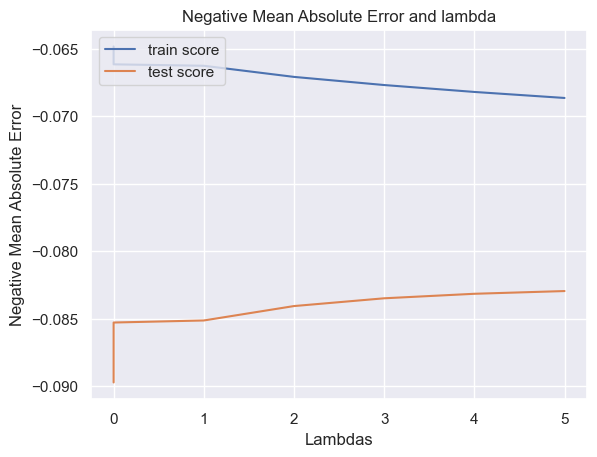

In [162]:
# Explicitly convert DataFrame columns to numpy arrays right before plotting
param_alpha_np = results_cv_ridge['param_alpha'].to_numpy()
mean_train_score_np = results_cv_ridge['mean_train_score'].to_numpy()
mean_test_score_np = results_cv_ridge['mean_test_score'].to_numpy()

# # plotting mean test and train scoes with alpha
plt.plot(param_alpha_np, mean_train_score_np, label='train score')
plt.plot(param_alpha_np, mean_test_score_np, label='test score')
plt.xlabel('Lambdas')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and lambda")
plt.legend(loc='upper left')
plt.show()

In [163]:
# Building the Ridge Model Parameters
model_params_ridge = list(ridge.coef_)
model_params_ridge.insert(0, ridge.intercept_)
model_params_ridge = [round(x, 3) for x in model_params_ridge]
cols = features.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params_ridge))

[('constant', 11.837),
 ('MSSubClass', -0.016),
 ('LotFrontage', 0.009),
 ('LotArea', 0.025),
 ('OverallQual', 0.064),
 ('OverallCond', 0.052),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.007),
 ('TotalBsmtSF', 0.036),
 ('1stFlrSF', 0.04),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.003),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.01),
 ('HouseAge', -0.002),
 ('MSZoning_FV', 0.148),
 ('MSZoning_RH', 0.105),
 ('MSZoning_RL', 0.125),
 ('MSZoning_RM', 0.097),
 ('LotShape_IR2', 0.003),
 ('LotShape_IR3', -0.02),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', -0.021),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.017),
 ('LotC

In [164]:
# Peform the Ridge Regression

rm = Ridge(alpha=2)
rm.fit(X_train, y_train)

# Predict it using the model

y_train_predict = rm.predict(X_train)
print(f"R2 for Training Data: {metrics.r2_score(y_true=y_train, y_pred=y_train_predict)}")

y_test_predict = rm.predict(X_test)
print(f"R2 for Test Data: {metrics.r2_score(y_true=y_test, y_pred=y_test_predict)}")

print(f"Root Mean Squared Error(RMSE) {np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))}")

R2 for Training Data: 0.9364005259321334
R2 for Test Data: 0.9104874577416382
Root Mean Squared Error(RMSE) 0.11314681053533825


## Conclusion
* From the above statistics it can be said that Ridge Regression when applied on the model give more accuracy then Lasso Regression.
* However, we will choose over here the Lasso Regression - reason being that it give flexible power to choose the features that are really significant and the coefficents for the feature that insignificant are brought down to 0.

## Fetching the feature that were derieved in the Lasso Regression (final List of the feature)

In [165]:
mod = list(zip(cols, model_params))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
pred = pd.DataFrame(para[(para['Coeff'] != 0)])


Lassso_var = list(pred['Variable'])
print(Lassso_var)


['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'WoodDeckSF', 'ScreenPorch', 'HouseAge', 'KitchenAbvGr', 'MSSubClass']


In [166]:
pred

,Variable,Coeff
0,constant,12.145
13,GrLivArea,0.129
4,OverallQual,0.102
5,OverallCond,0.056
9,TotalBsmtSF,0.041
7,BsmtFinSF1,0.032
21,GarageArea,0.030
20,Fireplaces,0.025
3,LotArea,0.016
2,LotFrontage,0.013


## Predict a Property's Value using the Regression Coefficents
Therefore, our preferred model now has the following equation:

$$ \log (PR \hat ICE) = \beta _0 + \beta _1 GrLivArea + \beta _2 OverallQual + \beta_3 OverallCond + \beta _4 TotalBsmtSF + ... + \beta _{16} MSSubClass $$

### Guidelines for Surprise Housing
    * Keep a check on the predictors that have direct impact on the price of the houses
    * The higher +ve values of the coefficents indicates that the high sale value of the house
    * The higher -ve values of the coefficents indicates that there is decrease in the sale of the house
    * One should buy the house when there is actual price of the house is less than the predicted value of house price.